Text(0.5, 1.0, 'Estimated noise power spectrafrom noisy speech (with initial condition)')

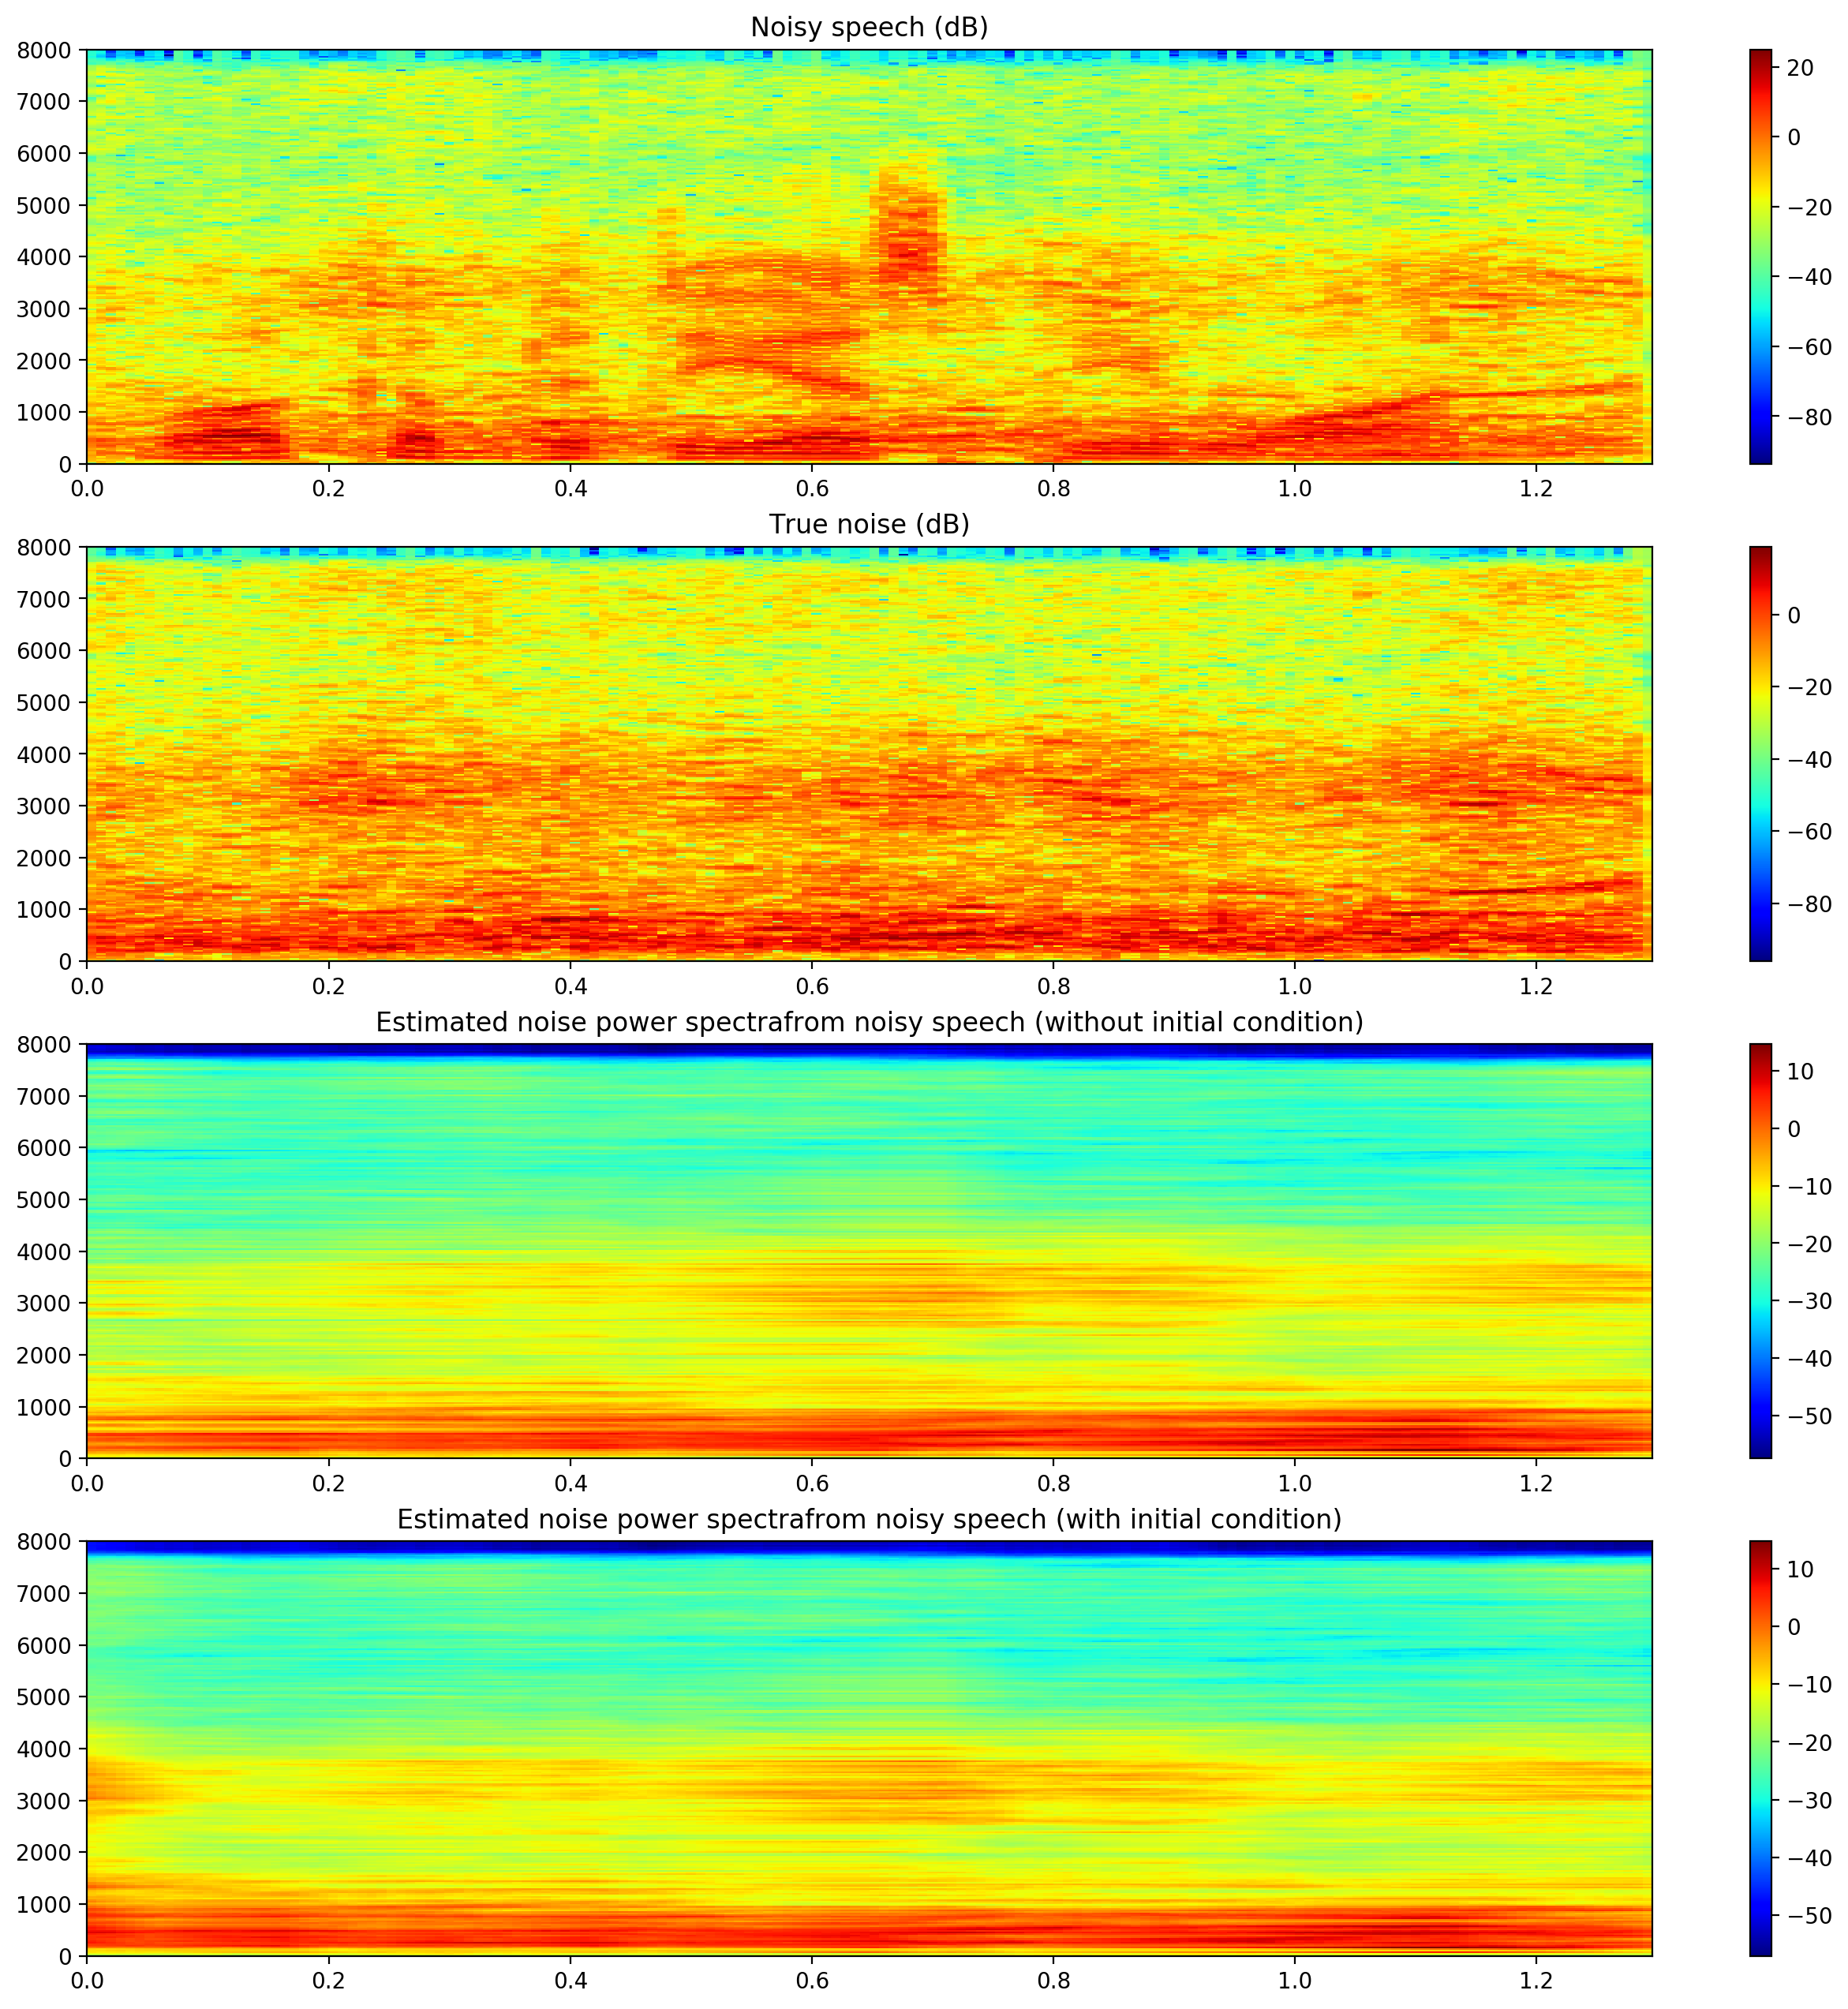

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from audlib.sig.transform import stpowspec
from audlib.io.audio import audioread
from audlib.noise import mmse_henriks
from audlib.sig.window import hamming
from audlib.quickstart import welcome
from audlib.sig.util import add_noise
from audlib.plot import specgram

# Make noisy signal
sig, sr = welcome()
noise, sr = audioread("/home/xyy/Documents/loizou_noise16k/cafeteria_babble.wav")  # replace with your noise file
noise = noise[:len(sig)]
noisy = add_noise(sig, noise, snr=5)

# Define short-time analysis parameters
window_length = 0.032  # in seconds
hop = 0.25
wsize = int(window_length * sr)
wind = hamming(wsize, hop=hop, synth=True)
nfft = 512

# Analysis
noisy = stpowspec(noisy, wind, hop, nfft)
npsd = stpowspec(noise, wind, hop, nfft)
npsd_hat0, _, _ = mmse_henriks(noisy)
npsd_hat1, _, _ = mmse_henriks(noisy, npsd.mean(axis=0))

# Plot
fig, axes = plt.subplots(figsize=(16, 16), dpi=200, nrows=4)
specgram(10*np.log10(noisy), axes[0], time_axis=np.arange(npsd.shape[0])*(window_length*hop),
                                freq_axis=np.linspace(0, sr/2, num=npsd.shape[1]))
axes[0].set_title("Noisy speech (dB)")
specgram(10*np.log10(npsd), axes[1], time_axis=np.arange(npsd.shape[0])*(window_length*hop),
                                freq_axis=np.linspace(0, sr/2, num=npsd.shape[1]))
axes[1].set_title("True noise (dB)")
specgram(10*np.log10(npsd_hat0), axes[2], time_axis=np.arange(npsd.shape[0])*(window_length*hop),
                                    freq_axis=np.linspace(0, sr/2, num=npsd.shape[1]))
axes[2].set_title("Estimated noise power spectrafrom noisy speech (without initial condition)")
specgram(10*np.log10(npsd_hat1), axes[3], time_axis=np.arange(npsd.shape[0])*(window_length*hop),
                                    freq_axis=np.linspace(0, sr/2, num=npsd.shape[1]))
axes[3].set_title("Estimated noise power spectrafrom noisy speech (with initial condition)")